# GMRES 
GMRES runs the Arnoldi process a few times on a general matrix and the computes the minum residual using Least Squares.  The main difficulty here is understanding how to use the Arnoldi call.  I am going to test on a matrix with clustered eigenvalues since I know that GMRES should converge well in this case.

## Arnoldi
Arnolid gives an orthogonal $Q$ satisfying 
$$A \, Q_k =  Q_{k+1} \, H_k$$
and the minimum residual is given by $x=Q y$ where
$$ y = \mbox{argmin}_y ||A Q_k y -b||
= \mbox{argmin}_y ||Q_k H_k y -b||
= \mbox{argmin}_y ||H_k y - Q_k b||
= \mbox{argmin}_y ||H_k y - ||b|| e_1||
$$

### Exact Clusters

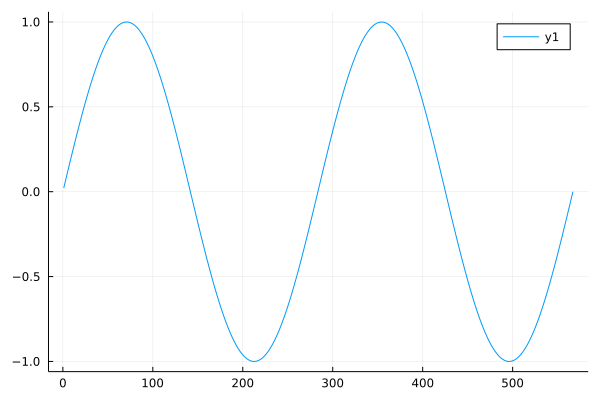

In [7]:
using LinearAlgebra, KrylovKit, Plots

# Make Test matrix
n=567;(m7,m12)=(17,54)
A= diagm([7.0*ones(m7);12.0*ones(m12); 8.0*ones(n-m7-m12) ]);
X= rand(n,n);
A = X*A*inv(X);

# Make recognizable solution and matching RHS b
x = zeros(n);
for i in 1:n
    x[i]=sin(4*pi*i/n)
end
b=A*x

# Initialize and run Arnoldi
k=23;
iterator = ArnoldiIterator(A, b)
factorization = initialize(iterator)
for i in 1:k-1
    expand!(iterator, factorization)
end

# Extract factors
(QInt, HSmall, res, normRes, KKitLittleb) = factorization
# Construct the non-square matrix H
H = zeros(k+1,k); H[1:k,:]=HSmall; H[k+1,k]=normRes
# Build Qk and QkPlus 
v=zeros(n)
Qk = zeros(n,k); Idk = Matrix(1.0I,k,k)
for i in 1:k
    Qk[:,i]=KrylovKit.unproject!(v,QInt,Idk[:,i])
end

# Compute least squares solution and embed in abient space
be1 = zeros(k+1); be1[1] = norm(b)
xGMRES = Qk*(H\be1)
plot(xGMRES)

### Fuzzy Clusters

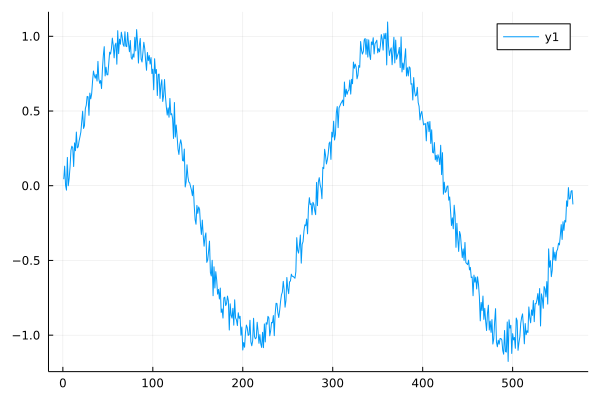

In [23]:
using LinearAlgebra, KrylovKit, Plots, Random, Distributions
Random.seed!(123) # Setting the seed
d=Normal(1.0,0.2)

# Make Test matrix
n=567;(m7,m12)=(17,54)
A= diagm([7.0*rand(d,m7);12.0*rand(d,m12); 8.0*rand(d, n-m7-m12) ]);
X= rand(n,n);
A = X*A*inv(X);

# Make recognizable solution and matching RHS b
x = zeros(n);
for i in 1:n
    x[i]=sin(4*pi*i/n)
end
b=A*x

# Initialize and run Arnoldi
k=8;
iterator = ArnoldiIterator(A, b)
factorization = initialize(iterator)
for i in 1:k-1
    expand!(iterator, factorization)
end

# Extract factors
(QInt, HSmall, res, normRes, KKitLittleb) = factorization
# Construct the non-square matrix H
H = zeros(k+1,k); H[1:k,:]=HSmall; H[k+1,k]=normRes
# Build Qk and QkPlus 
v=zeros(n)
Qk = zeros(n,k); Idk = Matrix(1.0I,k,k)
for i in 1:k
    Qk[:,i]=KrylovKit.unproject!(v,QInt,Idk[:,i])
end

# Compute least squares solution and embed in abient space
be1 = zeros(k+1); be1[1] = norm(b)
xGMRES = Qk*(H\be1)
plot(xGMRES)

In [13]:
using LinearAlgebra;
(m,n)=(17,15)
A = rand(m,n); b=rand(m);
xLS=A\b
xNE = (A'*A)\(A'*b)
norm(xLS-xNE)

6.774713583399086e-13